<a href="https://colab.research.google.com/github/ViniciusLe1te/AulaBI-Data/blob/main/datalake_warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conteúdo do Data warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-27         129          99         7221  produto 129  Eletrônicos
1    2024-04-03         129         164         9482  produto 129  Eletrônicos
2    2024-04-27         129          71         8649  produto 129  Eletrônicos
3    2024-04-03         111         150         4866  produto 111       Roupas
4    2024-04-29         111         182         9705  produto 111       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-01         158         178         8892  produto 158       Roupas
996  2024-04-06           4          77         2091    produto 4  Eletrônicos
997  2024-04-25         530         174         7253  produto 530       Roupas
998  2024-04-25          17          64         6189   produto 17  Eletrônicos
999  2024-04-15         581         121         7404  produto 581  Eletrônicos

[1000 rows x 6 columns]

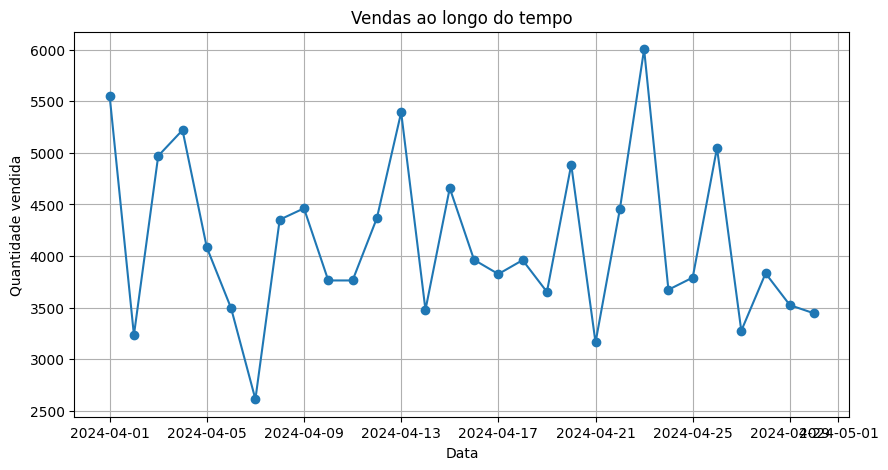


Análise de desempenho de produtos:
nome
produto 1       5335
produto 10      8582
produto 100    10368
produto 102    10862
produto 103     6113
               ...  
produto 92      4725
produto 93      3903
produto 95     25132
produto 98      6127
produto 99      2606
Name: valor_total, Length: 488, dtype: int64


In [2]:
#Data Warehouse

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# primeiro são gerados 600 produtos aleatórios com identificadores, nome e categoria
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# cria o DataFrame produtos e organiza os produtos criados
df_produtos = pd.DataFrame(produtos)

# criação de vendas
num_vendas = 1000  # cria 1000 vendas aleatórias para os produtos criados
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),  # criação de datas aleatórias
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),  # criação de quantidades aleatórias
    'valor_total': np.random.randint(1000, 10000, num_vendas),  # criação de valores totais aleatórios
}


# cria o DataFrame vendas e organiza as vendas criados
df_vendas = pd.DataFrame(data_vendas)


# criação de arquivos csv com os dados dos DataFrames
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)


# extração dos dados dos aquivos criados de volta para os DataFrames
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')


# junção dos dois DataFrames com base em 'produto_id', resultando no DataFrame merge
df_merge = pd.merge(df_vendas, df_produtos, on = 'produto_id', how = 'inner')


# cria um Data Warehouse com base no DataFrame merge
df_merge.to_csv('data_warehouse.csv', index = False)


# cria o DataFrame warehouse com base no arquivo criado anteriormente, após isso exibe seu conteudo na tela
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data warehouse:")
print(df_warehouse)



# PARTE 2
# criação do DataFrame warehouse com base no arquivo csv 'data_warehouse.csv'
df_warehouse = pd.read_csv('data_warehouse.csv')


# criação de uma análise de vendas por produto, com base em quantidade e valor total, organizado pelo nome do produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print('Análise de vendas por produto:')
print(vendas_por_produto)


# nova criação de uma análise de vendas por produto, novamente com base em quantidade e valor total, mas dessa vez organizado por categoria
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print('\nAnálise de vendas por categoria de produto:')
print(vendas_por_categoria)


# conversão da coluna 'data' para o tipo datetime, após isso cria uma análise como as anteriores, dessa vez com base na data
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)


# criação de um gráfico mostrando as vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker = 'o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()


# análise do total de vendas por produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [5]:
#Data Lake

import pandas as pd
import numpy as np
import os



# criação de um diretório chamado data_lake
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')


# definição de numero de arquivos e quantidade de dados por arquivo
num_files = 10
num_rows_per_file = 1000


# criação de uma lista com nome dfs
dfs = []


# geração de dados simulados para "10 arquivos"
for i in range(num_files):
    # geração de dados aleatórios para esses "arquivos"
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }


    # cria um DataFrame com os dados criados
    df = pd.DataFrame(data)


    # cria arquivos csv para cada um dos "10 arquivos"
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)


    # adiciona os dados gerados e o nome do arquivo à lista dfs
    dfs.append((file_name, df))


print("Dados do Data Lake gerados com sucesso!")


# mostra todos os arquivos criados na tela
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())




Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       53 -0.273761       B
1        3  1.825695       A
2        9  1.451777       A
3        5  1.163193       B
4       23 -1.871839       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       88  0.727388       A
1       82  0.652801       C
2       88 -0.520744       B
3       16  1.446412       A
4       68  0.323288       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       14 -0.428760       A
1       97 -0.474089       A
2       42 -0.644509       C
3       41  0.518699       B
4       14 -0.181165       A

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       77 -0.792601       C
1       36  0.115924       C
2       63  0.648300       A
3       11  0.037334       C
4       72 -1.111384       B

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       37 -0.387680     

Dados do Data Lake gerados com sucesso
Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       28 -0.671735       B
1       52 -0.888799       A
2       56  1.793735       C
3        8  1.322064       B
4       47 -1.121735       B

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.595000     0.057689
std      29.110761     1.021137
min       0.000000    -3.228601
25%      25.750000    -0.660780
50%      50.500000     0.086670
75%      76.000000     0.781422
max      99.000000     3.342782


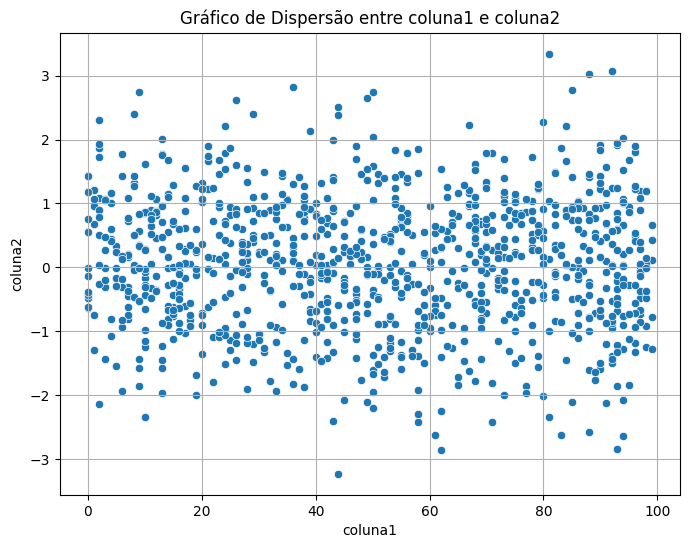

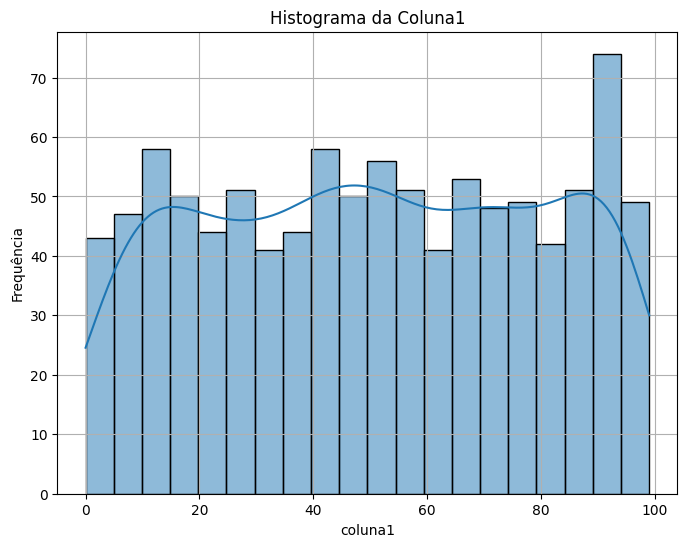

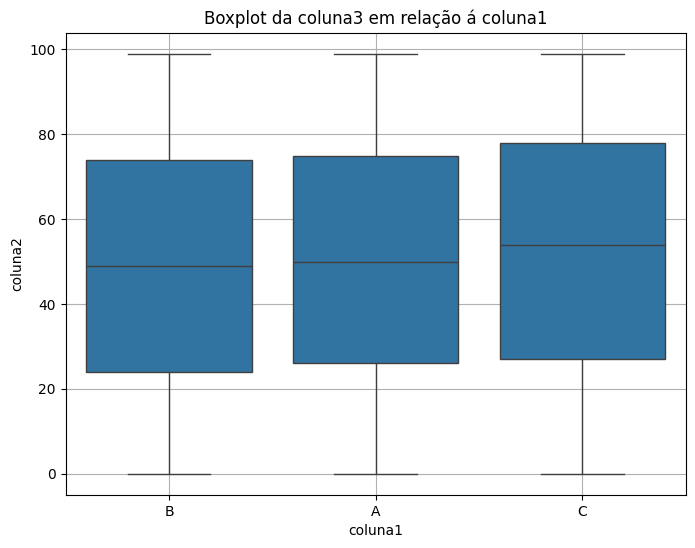

In [12]:
#Data Lake Sql

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy import inspect

# criação de um diretório chamado data_lake
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# definição de numero de arquivos e quantidade de dados por arquivo
num_files = 10
num_rows_per_file = 1000

# criação de uma lista com nome dfs
dfs = []

# geração de dados simulados para "10 arquivos"
for i in range(num_files):
    # geração de dados aleatórios para esses "arquivos"
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # cria um DataFrame com os dados criados
    df = pd.DataFrame(data)

    # cria arquivos csv para cada um dos "10 arquivos"
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Adiciona os DataFrames gerados à lista dfs
    dfs.append(df)

print("Dados do Data Lake gerados com sucesso")

# conexão banco de dados
# criação de uma string para conexão com o banco de dados
conn_string = 'sqlite:///data_lake.db'

# criação de mecanismo de conexão
engine = create_engine(conn_string)

# iteração dos DataFrames da lista para tabelas individuais no banco de dados
for i, df in enumerate(dfs, 1):
    table_name = f'dados_{i}'
    if not inspect(engine).has_table(table_name):
        df.to_sql(table_name, engine, index=False)



# conexão banco de dados
# criação de uma string para conexão com o banco de dados + criação de mecanismo de conexão
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)


# define o nome da tabela no banco de dados para a extração dos dados
table_name = 'dados_1'   # extração dos dados da tabela e armazenamento no DataFrame df
df = pd.read_sql_table(table_name, engine)


# mostra as primeiras linhas do databrame carregado
print("Primeiras linhas do DataFrame:")
print(df.head())


# mostra informações sobre o DataFrame, incluindo o tipo de dados de cada coluna e o número de valores não nulos
print("\nInformações sobre o DataFrame:")
print(df.info())

# mostra um resumo das colunas numéricas do DataFrame, incluindo contagem, média, desvio padrão, mínimo, quartis e máximo
print("\nResumo estatístico do DataFrame:")
print(df.describe())


# visualização em gráfico
# grafico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()



# histograma da coluna 1
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da Coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# Boxplot da coluna 3 em relação á coluna 1
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação á coluna1')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()